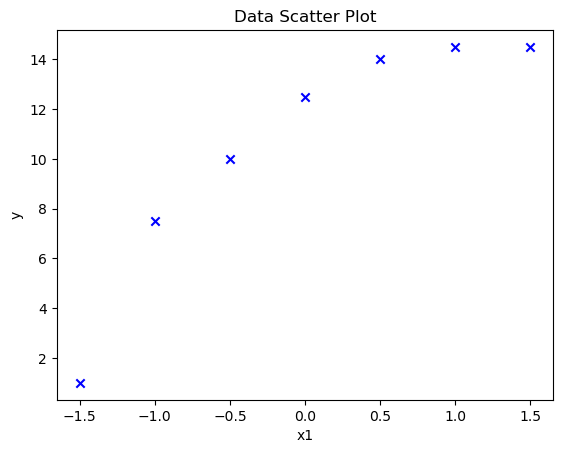

Learned weights: [ 9.07346218 -0.60017493 -4.61660097]
Learned bias: 10.571428571428484


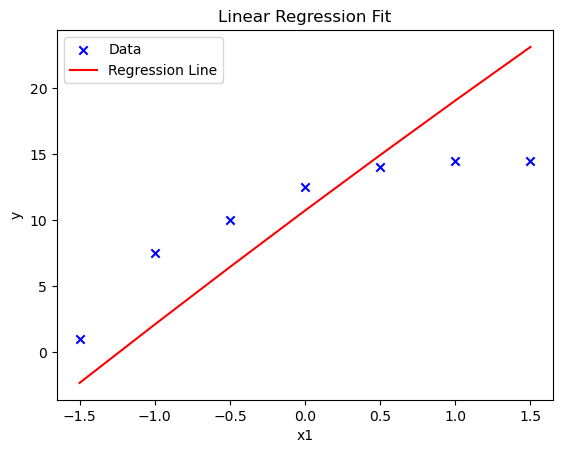

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define input data
x1raw = np.array([1, 2, 3, 4, 5, 6, 7])
x2raw=x1raw**2
x3raw=x1raw**3

mean_x1,std_x1=np.mean(x1raw),np.std(x1raw)
mean_x2,std_x2=np.mean(x2raw),np.std(x2raw)
mean_x3,std_x3=np.mean(x3raw),np.std(x3raw)

x1=(x1raw-mean_x1)/std_x1
x2=(x2raw-mean_x2)/std_x2
x3=(x3raw-mean_x3)/std_x3

x = np.stack((x1, x2, x3), axis=1)
y = np.array([1, 7.5, 10, 12.5, 14, 14.5, 14.5])

# Plot the data
plt.scatter(x1, y, marker='x', color='b')
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Data Scatter Plot")
plt.show()

# Gradient function
def gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(m):
        # Compute the prediction
        f_b = np.dot(w, x[i]) + b
        err = f_b - y[i]

        # Accumulate gradients
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db += err

    # Average over the number of samples
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

# Gradient Descent function
def gradient_descent(x, y, w, b, alpha, num_iters):
    for _ in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
    return w, b

# Initialize parameters
w_init = np.zeros(x.shape[1])
b_init = 0
alpha = 0.01
num_iters = 10000

# Run gradient descent
w, b = gradient_descent(x, y, w_init, b_init, alpha, num_iters)

# Print the results
print("Learned weights:", w)
print("Learned bias:", b)

# Plot the regression line
plt.scatter(x1, y, marker='x', color='b', label="Data")
l = w[0] * x1 + w[1] * x2 + b  # Regression line
plt.plot(x1, l, color='r', label="Regression Line")
plt.xlabel("x1")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

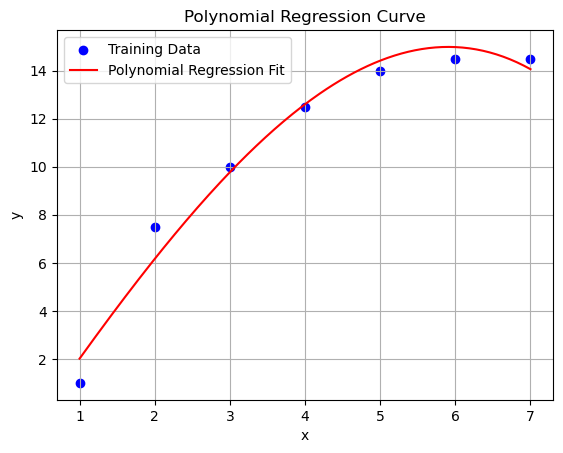

In [4]:
# --- Predict on Smooth Curve ---
x_plot = np.linspace(1, 7, 200)
x1p = (x_plot - mean_x1) / std_x1
x2p = ((x_plot ** 2) - mean_x2) / std_x2
x3p = ((x_plot ** 3) - mean_x3) / std_x3

x_plot_poly = np.stack((x1p, x2p, x3p), axis=1)
y_pred_plot = np.dot(x_plot_poly, w) + b

# --- Plot Original Points and Regression Curve ---
plt.scatter(x_raw, y, color='blue', label='Training Data')
plt.plot(x_plot, y_pred_plot, color='red', label='Polynomial Regression Fit')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression Curve")
plt.legend()
plt.grid(True)
plt.show()
